In [40]:
import pandas as pd
import numpy as np




In [238]:
#read emissions csv

emissions= pd.read_csv("emission.csv")
emissions.set_index("Country Code")

#read population csv
population= pd.read_csv("populaiton country by year.csv")
population.set_index("Country Code")

#print(population.head())
population.set_index("Country Code")

#realign emissions

emissions2= emissions.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
        var_name="Year", 
        value_name="Value_of_Emissions")
print("emissions dataset \n" )
print(emissions2.head())

#calculate average emissions
average= emissions2["Value_of_Emissions"].mean()
print("\n average: ")
print(average)

#read temperature csv
temps= pd.read_csv("temperature.csv")
print("temp dataset \n" )
print(temps.head())



#realign population

population2= population.melt(id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"], 
        var_name="Year", 
        value_name="Population")

print(population2.head())

#merge populaiton to emissions
new_df = emissions2.merge(population2, left_on=['Country Name','Year'], right_on = ['Country Name','Year'], how='left')

print("emissions and population \n")
print(new_df.head())
new_df["Emissions_per_capita"] = new_df["Value_of_Emissions"]/ new_df["Population"]
print("added new column \n")
print(new_df.head())

#make new df grouped by month and averaging temp change

print("temps new \n")
new_temps= temps.groupby(["Year", "Area"]).mean()

print("\n new temps \n")
print(new_temps)




emissions dataset 

                  Country Name Country Code  \
0                        Aruba          ABW   
1  Africa Eastern and Southern          AFE   
2                  Afghanistan          AFG   
3   Africa Western and Central          AFW   
4                       Angola          AGO   

                           Indicator Name  Indicator Code  Year  \
0  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1960   
1  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1960   
2  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1960   
3  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1960   
4  CO2 emissions (metric tons per capita)  EN.ATM.CO2E.PC  1960   

   Value_of_Emissions  
0                 NaN  
1            0.906060  
2            0.046057  
3            0.090880  
4            0.100835  

 average: 
4.10493173511307
temp dataset 

  Domain Code              Domain  Area Code (FAO)         Area  Element Code  \
0          ET  Temperatur

In [239]:
#drop months from temps
nomonths_temps = temps
nomonths_temps = nomonths_temps.drop(['Months'], axis=1)
nomonths_temps = nomonths_temps.drop(['Months Code'], axis=1)

print(nomonths_temps.columns)


nomonths_temps2= nomonths_temps.groupby(["Year", "Area"]).mean()
nomonths_temps2.head()




Index(['Domain Code', 'Domain', 'Area Code (FAO)', 'Area', 'Element Code',
       'Element', 'Year Code', 'Year', 'Unit', 'Value', 'Flag',
       'Flag Description'],
      dtype='object')


Area Code (FAO)  Element Code  Year Code     Value
Year Area                                                              
1961 Afghanistan                 2.0        7271.0     1961.0 -0.017471
     Albania                     3.0        7271.0     1961.0  0.481588
     Algeria                     4.0        7271.0     1961.0  0.228412
     American Samoa              5.0        7271.0     1961.0  0.024588
     Andorra                     6.0        7271.0     1961.0  0.947941

In [298]:
nomonths_temps["Year Code"].astype(int)
nomonths_temps.head()




,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,2,Afghanistan,7271,Temperature change,1961,1961,?C,0.746,Fc,Calculated data
1,ET,Temperature change,2,Afghanistan,7271,Temperature change,1962,1962,?C,0.009,Fc,Calculated data
2,ET,Temperature change,2,Afghanistan,7271,Temperature change,1963,1963,?C,2.695,Fc,Calculated data
3,ET,Temperature change,2,Afghanistan,7271,Temperature change,1964,1964,?C,-5.277,Fc,Calculated data
4,ET,Temperature change,2,Afghanistan,7271,Temperature change,1965,1965,?C,1.827,Fc,Calculated data


In [299]:
#finalize temps without months, grouping by area and year

temp_final= nomonths_temps[["Area", "Year","Value"]]
print(temp_final.head())



          Area  Year  Value
0  Afghanistan  1961  0.746
1  Afghanistan  1962  0.009
2  Afghanistan  1963  2.695
3  Afghanistan  1964 -5.277
4  Afghanistan  1965  1.827


,Area,Year,Value
0,Afghanistan,1961,0.746
1,Afghanistan,1962,0.009
2,Afghanistan,1963,2.695
3,Afghanistan,1964,-5.277
4,Afghanistan,1965,1.827


In [301]:
#finally get the temps dataset in order


yearly_avg2=temp_final[["Area", "Year", "Value"]].groupby(["Area", "Year"],as_index=False).Value.mean()
yearly_avg2.head()

,Area,Year,Value
0,Afghanistan,1961,-0.017471
1,Afghanistan,1962,-0.248824
2,Afghanistan,1963,0.848176
3,Afghanistan,1964,-0.958882
4,Afghanistan,1965,-0.102294


In [302]:

new_df.head(20)

#change data types to match

new_df["Year"]= pd.to_numeric(new_df["Year"], errors='coerce')

new_df.head()


#merge temp with the emissions+popualiton datset


final= new_df.merge(yearly_avg2, left_on=['Country Name','Year'], right_on = ['Area','Year'], how='left')
final.head(270)

#drop unnecesay colums


final.head()
final2 = final.drop(["Indicator Name_x", "Indicator Code_x", "Country Code_y", "Indicator Code_y", "Indicator Name_y"], axis=1)
final2.head()

#We finally have a good looking dataset!!! A lot of values are missing for 1960, but that's ok! 
#Note: value = temeprature chane awawy from a value considered normal. 
#Not suere who decided what nromal is or how they decided it. I should look into that




,Country Name,Country Code_x,Year,Value_of_Emissions,Population,Emissions_per_capita,Area,Value
0,Aruba,ABW,1960.0,NaN,54208.0,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1960.0,0.906060,130836765.0,6.925114e-09,NaN,NaN
2,Afghanistan,AFG,1960.0,0.046057,8996967.0,5.119141e-09,NaN,NaN
3,Africa Western and Central,AFW,1960.0,0.090880,96396419.0,9.427689e-10,NaN,NaN
4,Angola,AGO,1960.0,0.100835,5454938.0,1.848513e-08,NaN,NaN


<AxesSubplot:title={'center':'global temperature change'}, xlabel='Year'>

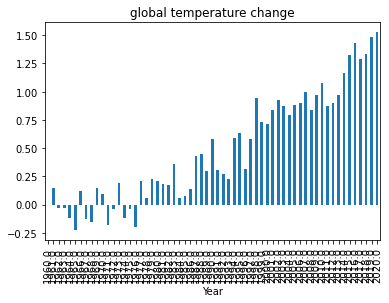

In [283]:
#graph gloabl temperature change
import matplotlib as plt
global_change= final2[["Country Name", "Year", "Value"]].groupby(by="Year").Value.mean()
global_change.plot(kind= "bar", title= "global temperature change")


Enter a country: Somalia
Somalia
the average change in temperatrueaway from the norm in Somalia since 1961 is: 
0.623


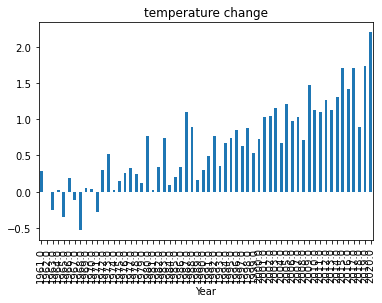

In [178]:
#Graph temperature change for any chosen country

#accept input

val= input("Enter a country: ")
print(val)

#graph
df_country= final[["Area", "Year", "Value"]].loc[(final["Area"] ==val)].groupby(by="Year").Value.mean()

df_country.plot(kind="bar", title = "temperature change")


#claculate average
average_country_temp_change= final[["Area", "Year", "Value"]].loc[(final["Area"] ==val)].Value.mean()

rounded_average_country_temp_change = round(average_country_temp_change,3)
print("the average change in temperatrueaway from the norm in " + str(val) + " since 1961 is: ")
print(rounded_average_country_temp_change)

<AxesSubplot:title={'center':'global emissions per capita'}, xlabel='Year'>

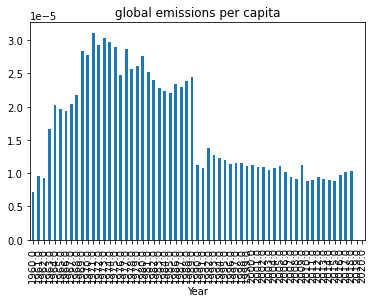

In [284]:
#global emissions per capita

global_emissions= final2[["Country Name", "Year", "Emissions_per_capita"]].groupby(by="Year").Emissions_per_capita.mean()
global_emissions.plot(kind= "bar", title= "global emissions per capita")

Enter a country: Mongolia
Mongolia
the average emissions per capita in Mongolia since 1961 is: 
1.9559e-06


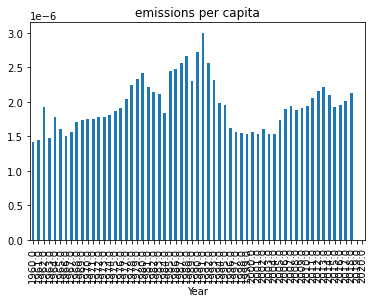

In [303]:



#Emissions per capita


valz= input("Enter a country: ")
print(valz)


df_country3= final2[["Country Name", "Year", "Emissions_per_capita"]].loc[(final["Country Name"] ==valz)].groupby(by="Year").Emissions_per_capita.mean()

df_country3.plot(kind="bar", title = "emissions per capita")


#claculate average
average_country_emissions_per_capita= final2[["Area", "Year", "Emissions_per_capita"]].loc[(final2["Area"] ==valz)].Emissions_per_capita.mean()

rounded_average_country_emissions_per_capita = round(average_country_emissions_per_capita,10)
print("the average emissions per capita in " + str(valz) + " since 1961 is: ")
print(rounded_average_country_emissions_per_capita)



<AxesSubplot:title={'center':'global populaiton'}, xlabel='Year'>

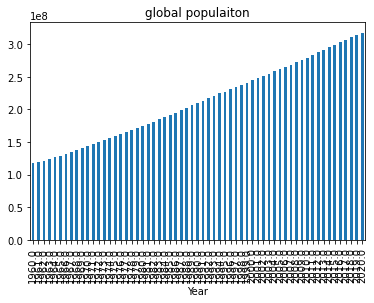

In [287]:
#graph population of earth

global_pop= final2[["Country Name", "Year", "Population"]].groupby(by="Year").Population.mean()
global_pop.plot(kind= "bar", title= "global populaiton")


Enter a country: Germany
Germany
the average population over the last 60 years in Germany is: 
79724672


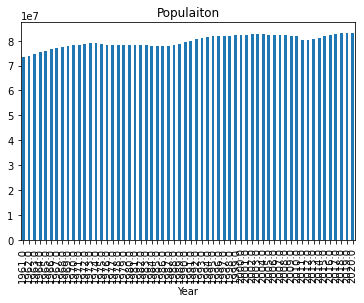

In [220]:
#population of any country

#accept user input
val2= input("Enter a country: ")
print(val2)


df_country3= final2[["Area", "Year", "Population"]].loc[(final["Area"] ==val2)].groupby(by="Year").Population.mean()

df_country3.plot(kind="bar", title = "Populaiton")


#claculate average
average_country_pop= final2[["Area", "Year", "Population"]].loc[(final2["Area"] ==val2)].Population.mean()

rounded_average_country_pop = round(average_country_pop)
print("the average population over the last 60 years in " + str(val2) + " is: ")
print(rounded_average_country_pop)

<AxesSubplot:title={'center':'global emissions'}, xlabel='Year'>

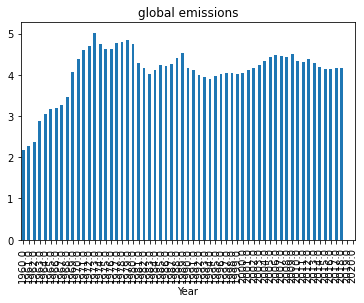

In [246]:
#global emissions
final2.head()

global_emis= final2[["Area", "Year", "Value_of_Emissions"]].groupby(by="Year").Value_of_Emissions.mean()
global_emis.plot(kind= "bar", title= "global emissions")


Enter a country: France
France
the average emissions over the last 60 years in France is: 
6.744
tons of C02


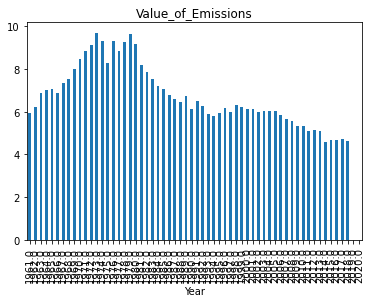

In [253]:
#graph total emissions of any country

val5= input("Enter a country: ")
print(val5)


df_country4= final2[["Area", "Year", "Value_of_Emissions"]].loc[(final["Area"] ==val5)].groupby(by="Year").Value_of_Emissions.mean()

df_country4.plot(kind="bar", title = "Value_of_Emissions")


#claculate average
average_country_emiss= final2[["Area", "Year", "Value_of_Emissions"]].loc[(final2["Area"] ==val2)].Value_of_Emissions.mean()

rounded_average_country_emiss = round(average_country_emiss, 3)
print("the average emissions over the last 60 years in " + str(val5) + " is: ")
print(rounded_average_country_emiss)
print("tons of C02")

usa emission


<AxesSubplot:title={'center':'US emissions over the years'}, xlabel='Year'>

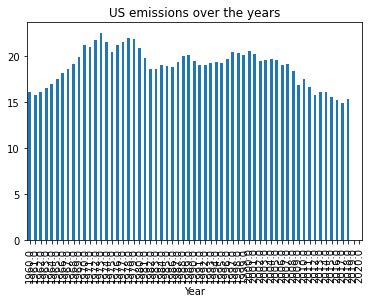

In [296]:
#graph emissions just of usa

print("usa emission")
df_usa= final2[["Country Name", "Year", "Value_of_Emissions"]].loc[(final2["Country Name"] =="United States")].groupby(by="Year").Value_of_Emissions.mean()

df_usa.plot(kind= "bar", title = "US emissions over the years")



usa emission


<AxesSubplot:title={'center':'US  per capita emissions over the years'}, xlabel='Year'>

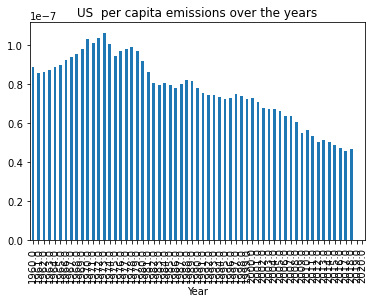

In [297]:
#Graph us per capita emissions

print(" per capita usa emission")
df_usa= final2[["Country Name", "Year", "Emissions_per_capita"]].loc[(final2["Country Name"] =="United States")].groupby(by="Year").Emissions_per_capita.mean()

df_usa.plot(kind= "bar", title = "US  per capita emissions over the years")

